In [26]:
import pandas as pd 
import os

In [27]:
notebook_path = os.path.dirname(os.getcwd())

In [28]:
microbes = pd.read_csv(os.path.join(notebook_path, 'data/microbes.csv'))
microbes.set_index('id', inplace=True)
microbes.head()


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
id,,,,,,,,,,,,,,,,,,,,,
0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.90,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.20,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,10.20,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,10.70,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,1.22,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [29]:
max(microbes["microorganisms"].value_counts()/len(microbes))

0.2430635175418482

In [30]:
microbes["microorganisms"].unique()

array(['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Raizopus',
       'Penicillum', 'Aspergillus sp', 'Protozoa', 'Diatom', 'Ulothrix'],
      dtype=object)

In [31]:
from sklearn.model_selection import train_test_split

X = microbes.drop('microorganisms', axis=1)
y = microbes['microorganisms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



                precision    recall  f1-score   support

Aspergillus sp       0.39      0.47      0.42       753
        Diatom       0.39      0.23      0.29       345
    Penicillum       0.30      0.03      0.05       235
    Pithophora       0.62      0.54      0.58       280
      Protozoa       0.44      0.39      0.41       770
      Raizopus       0.64      0.72      0.68       534
     Spirogyra       0.00      0.00      0.00       112
      Ulothrix       0.46      0.61      0.53      1497
        Volvox       0.49      0.51      0.50       844
         Yeast       0.54      0.42      0.47       736

      accuracy                           0.48      6106
     macro avg       0.43      0.39      0.39      6106
  weighted avg       0.47      0.48      0.46      6106



/home/augustinmvl/.pyenv/versions/3.10.12/envs/Artefact/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


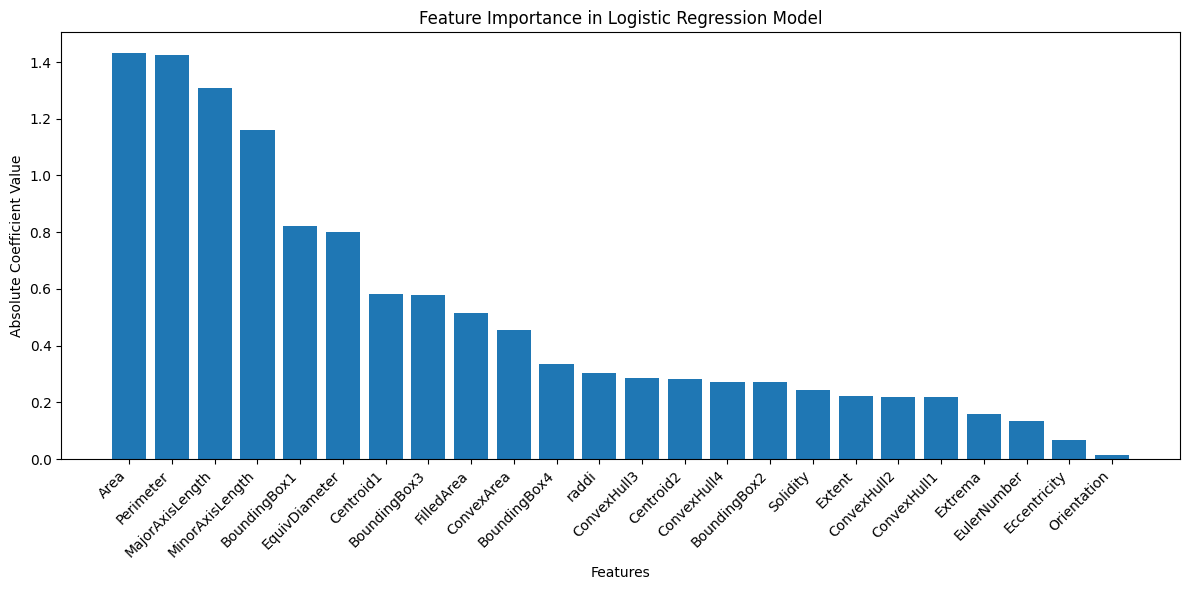


Top 10 Most Important Features:
            feature  importance
22             Area    1.432986
18        Perimeter    1.425881
16  MajorAxisLength    1.307503
17  MinorAxisLength    1.161531
8      BoundingBox1    0.823607
2     EquivDiameter    0.801281
20        Centroid1    0.582219
10     BoundingBox3    0.578321
4        FilledArea    0.516821
19       ConvexArea    0.455800


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = np.abs(model.coef_).mean(axis=0)  # Average across all classes for multiclass
feature_names = X.columns

# Create DataFrame of feature importance
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

In [34]:
X = X[importance_df.feature[:4].values]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

Aspergillus sp       0.27      0.24      0.26       753
        Diatom       0.24      0.04      0.07       345
    Penicillum       0.00      0.00      0.00       235
    Pithophora       0.60      0.34      0.44       280
      Protozoa       0.23      0.06      0.09       770
      Raizopus       0.47      0.81      0.59       534
     Spirogyra       0.00      0.00      0.00       112
      Ulothrix       0.34      0.69      0.45      1497
        Volvox       0.29      0.28      0.29       844
         Yeast       0.55      0.17      0.26       736

      accuracy                           0.35      6106
     macro avg       0.30      0.26      0.24      6106
  weighted avg       0.33      0.35      0.30      6106



/home/augustinmvl/.pyenv/versions/3.10.12/envs/Artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/augustinmvl/.pyenv/versions/3.10.12/envs/Artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/augustinmvl/.pyenv/versions/3.10.12/envs/Artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

Aspergillus sp       0.97      0.97      0.97       753
        Diatom       0.97      1.00      0.99       345
    Penicillum       1.00      1.00      1.00       235
    Pithophora       0.97      0.94      0.95       280
      Protozoa       0.99      1.00      0.99       770
      Raizopus       1.00      1.00      1.00       534
     Spirogyra       0.98      0.79      0.87       112
      Ulothrix       0.99      0.98      0.99      1497
        Volvox       0.99      1.00      1.00       844
         Yeast       0.99      1.00      0.99       736

      accuracy                           0.99      6106
     macro avg       0.98      0.97      0.97      6106
  weighted avg       0.99      0.99      0.99      6106



In [36]:
import pickle
import os

saving_path = os.path.join(notebook_path, 'models/microbe_model.pkl')
os.makedirs(os.path.dirname(saving_path), exist_ok=True)
pickle.dump(model, open(saving_path, 'wb'))